In [190]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.io as pio
sns.set()


In [2]:
from IPython.display import Markdown, display, Image
import numpy as np
import pandas as pd
import random
import math
import dvc.api


In [727]:
from helper import Helper
from app_logger import App_Logger
import plots

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
logger = App_Logger("data_exploration.log").get_app_logger()

In [6]:
helper = Helper()

In [7]:
train_df = helper.read_csv("../data/train.csv")
store_df = helper.read_csv("../data/store.csv")
test_df = helper.read_csv("../data/test.csv")

file read as csv
file read as csv
file read as csv


## Data Overview for store data

In [8]:
class DataOverview:
    
    def __init__(self, df):
        
        self.df = df
    
    def read_head(self, top=5):
        return self.df.head(top)
    
    # returning the number of rows columns and column information
    def get_info(self):
        row_count, col_count = self.df.shape
    
        print(f"Number of rows: {row_count}")
        print(f"Number of columns: {col_count}")
        print("================================")

        return (row_count, col_count), self.df.info()
    
    def get_count(self, column_name):
        return pd.DataFrame(self.df[column_name].value_counts())
    
    # getting the null count for every column
    def get_null_count(self, column_name):
        print("Null values count")
        print(self.df.isnull().sum())
        return self.df.isnull().sum()
    
    # getting the percentage of missing values
    def get_percent_missing(self):
        helper = Helper()
        percent_missing = helper.percent_missing(self.df)
        null_percent_df = pd.DataFrame(columns = ['column', 'null_percent'])
        columns = self.df.columns.values.tolist()
        null_percent_df['column'] = columns
        null_percent_df['null_percent'] = null_percent_df['column'].map(lambda x: helper.percent_missing_for_col(self.df, x))
        
        
        return null_percent_df.sort_values(by=['null_percent'], ascending = False), percent_missing
    
    

In [9]:
storeDataOverview = DataOverview(store_df)

In [719]:

display(storeDataOverview.read_head(10))

display(storeDataOverview.get_info())




,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


Number of rows: 1115
Number of columns: 10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


((1115, 10), None)

Number of rows is 1115 and number of columns is 10

In [11]:

display(storeDataOverview.get_count("Promo2SinceYear"))
display(storeDataOverview.get_count("PromoInterval"))


,Promo2SinceYear
2011.0,128
2013.0,120
2014.0,95
2012.0,81
2009.0,73
2010.0,64
2015.0,10


,PromoInterval
"Jan,Apr,Jul,Oct",335
"Feb,May,Aug,Nov",130
"Mar,Jun,Sept,Dec",106


### Null Value analysis for store df

In [720]:
store_null_df, percent_missing = storeDataOverview.get_percent_missing()
display(store_null_df)

,column,null_percent
7,Promo2SinceWeek,48.79
8,Promo2SinceYear,48.79
9,PromoInterval,48.79
4,CompetitionOpenSinceMonth,31.75
5,CompetitionOpenSinceYear,31.75
3,CompetitionDistance,0.27
0,Store,0.00
1,StoreType,0.00
2,Assortment,0.00
6,Promo2,0.00


Promo2SinceWeek, Promo2SinceYear and PromoInterval has a meanigful NA values. They have NA values if is Stores do not participate in a continuing and consecutive promotion

CompetitionOpenSinceYear, CompetitionOpenSinceMonth has also a meanigful. NA values NA values mean the competitor were opened before the stores opened

A column that has missing value and does not have a special meaning is CompetitionDistance

In [12]:
store_df[store_df['CompetitionDistance'].isna()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


There are only three rows with  NA values in CompetitionDistance Column

In [13]:

class clean_store_df:
    """ This is a class to clean store df"""
    
    def __init__(self):
        pass
    
    def handle_missing_value(self, df):
        """We handled CompetitionDistance by replacing it with median"""
        
        try:
            df['CompetitionDistance'] = df['CompetitionDistance'].fillna(data_store['CompetitionDistance'].median())
            return df
        except:
            pass
             
                                                                                     
                                                                                     

## Data Overview for train data


In [14]:

trainDataOverview = DataOverview(train_df)


In [15]:

display(trainDataOverview.read_head(10))
display(trainDataOverview.get_info())


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


Number of rows: 1017209
Number of columns: 9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


((1017209, 9), None)

,column,null_percent
0,Store,0.0
1,DayOfWeek,0.0
2,Date,0.0
3,Sales,0.0
4,Customers,0.0
5,Open,0.0
6,Promo,0.0
7,StateHoliday,0.0
8,SchoolHoliday,0.0


- Number of rows is 1017209 and number of columns is 9.
- Each row represents sales made at some point of time

In [16]:

display(trainDataOverview.get_count("StateHoliday"))
display(trainDataOverview.get_count("SchoolHoliday"))
display(trainDataOverview.get_count("Open"))


,StateHoliday
0,855087
0,131072
a,20260
b,6690
c,4100


,SchoolHoliday
0,835488
1,181721


,Open
1,844392
0,172817


 - In StateHoliday 0 represents no holiday, a represents public holiday, b represents Easter Holiday and c Christmass Holiday 
 - In State Holiday we are seeing two 0 values. one is a str value the other is int value, we need to change all 0 values to into str type
 - In Schoolday 0 represents 0 no school holiday, 1 represents school day
 

### Null value analysis on train df

In [726]:
store_null_df, percent_missing = trainDataOverview.get_percent_missing()
display(store_null_df)


,column,null_percent
0,Store,0.0
1,DayOfWeek,0.0
2,Date,0.0
3,Sales,0.0
4,Customers,0.0
5,Open,0.0
6,Promo,0.0
7,StateHoliday,0.0
8,SchoolHoliday,0.0
9,Year,0.0


- We dont have any missing values on our train data

### Sales on Closed Date

In [17]:

display(train_df[train_df["Open"] == 0].sample(5))
display(train_df.query("Open == 0 & Sales > 0"))


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
383395,268,7,2014-07-27,0,0,0,0,0,0
919641,552,5,2013-03-29,0,0,0,1,b,1
351184,878,7,2014-08-31,0,0,0,0,0,0
44713,114,7,2015-06-21,0,0,0,0,0,0
154844,975,7,2015-03-15,0,0,0,0,0,0


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


 - There are only 5 rows having 0 value on open column
 - There are no any sales Stores are closed 

In [334]:

class CleanTrainTestData:
    """
        this is a dataframe used to clean a dataframe
    """
    
    def __init__(self):
        pass
    
    def drop_closed_stores(self, df):
        
        try:
            cleaned = df.query("Open == 1")
            return cleaned
        except:
            pass
        
    def convert_to_datatime(self, df):  
        try:
            df['Date'] = pd.to_datetime(train_df['Date'])
            return df
        except:
            pass
    
    def sort_by_date(self, df):
        return df.sort_values(by=["Date"], ascending=False)
    
    def to_str(self, df):
        df['StateHoliday'] = df['StateHoliday'].astype(str)
        return df
    
    
    """Extracts Day Month and Year from Date"""
    def transform_date(self, df):
        
        df['Date'] = pd.to_datetime(df['Date'])
        df['Year'] = pd.DatetimeIndex(df['Date']).year
        df['Month'] = pd.DatetimeIndex(df['Date']).month
        df['Day'] = pd.DatetimeIndex(df['Date']).day
        return df
    

    




In [335]:
## Handling outliers

In [336]:

cleaner = CleanTrainTestData()
cleaned_train_df = cleaner.transform_date(train_df)
cleaned_train_df = cleaner.sort_by_date(cleaned_train_df)
cleaned_train_df = cleaner.to_str(cleaned_train_df)


display(cleaned_train_df)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31
742,743,5,2015-07-31,5085,501,1,1,0,1,2015,7,31
748,749,5,2015-07-31,6612,716,1,1,0,1,2015,7,31
747,748,5,2015-07-31,7481,578,1,1,0,1,2015,7,31
746,747,5,2015-07-31,10708,826,1,1,0,1,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...
1016471,377,2,2013-01-01,0,0,0,0,a,1,2013,1,1
1016472,378,2,2013-01-01,0,0,0,0,a,1,2013,1,1
1016473,379,2,2013-01-01,0,0,0,0,a,1,2013,1,1
1016474,380,2,2013-01-01,0,0,0,0,a,1,2013,1,1


In [337]:

# we merge the train dataframe with the store dataframe
merged_df = pd.merge(cleaned_train_df, store_df, on="Store")


## Sales comparision for each store type on monthly bases

,Store-A Sales,Store-B Sales,Store-C Sales,Store-D Sales
Month,,,,
1,5440.321622,9067.295383,5418.967088,5352.560283
2,5626.986849,9631.862745,5601.013514,5500.918138
3,5748.996660,9840.685009,5725.103458,5673.283031
4,5718.125028,10097.420261,5658.500375,5596.009036
5,5419.004537,10459.871600,5429.085804,5394.785410
6,5723.595663,10356.075817,5627.827628,5657.755492
7,6032.583774,10175.588387,5935.111028,5967.260443
8,5670.392339,9528.931574,5632.468771,5556.152164
9,5564.154821,9723.497980,5459.672222,5409.183686


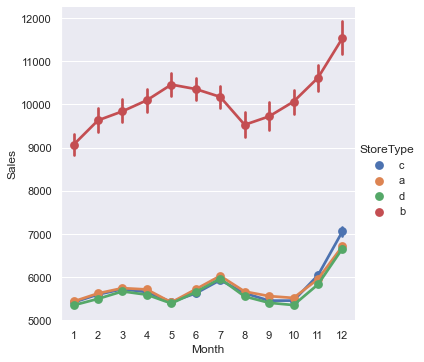

In [554]:
store_a = merged_df[merged_df["StoreType"] == "a"]
store_b = merged_df[merged_df["StoreType"] == "b"]
store_c = merged_df[merged_df["StoreType"] == "c"]
store_d = merged_df[merged_df["StoreType"] == "d"]


store_a_month_agg = store_a.groupby("Month").agg({"Sales": "mean"}).rename(columns={"Sales": "Store-A Sales"})
store_b_month_agg = store_b.groupby("Month").agg({"Sales": "mean"}).rename(columns={"Sales": "Store-B Sales"})
store_c_month_agg = store_c.groupby("Month").agg({"Sales": "mean"}).rename(columns={"Sales": "Store-C Sales"})
store_d_month_agg = store_d.groupby("Month").agg({"Sales": "mean"}).rename(columns={"Sales": "Store-D Sales"})

store_sales_month = pd.merge(store_a_month_agg, store_b_month_agg, on="Month")
store_sales_month = pd.merge(store_sales_month, store_c_month_agg, on="Month")
store_sales_month = pd.merge(store_sales_month, store_d_month_agg, on="Month")

display(store_sales_month)

sns.factorplot(data = merged_df, x ="Month", y = "Sales",
               hue = 'StoreType')




 - Store type A, D, and D has similar monthly sales pattern but B has the most sales behavior.

In [383]:
import plotly.graph_objects as go


### Check for distribution in both training and test sets 

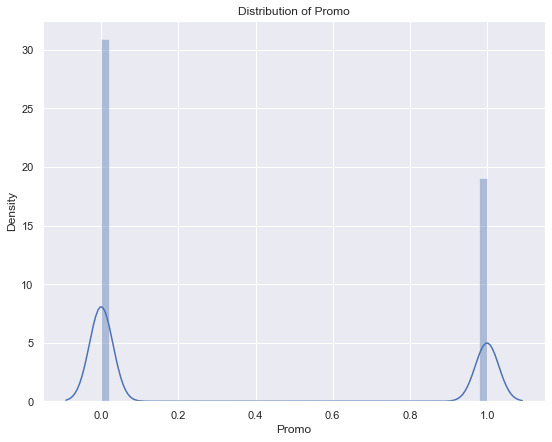

In [343]:
plt.figure(figsize=(9, 7))
sns.distplot(train_df['Promo']).set_title(f'Distribution of Promo')
plt.show()


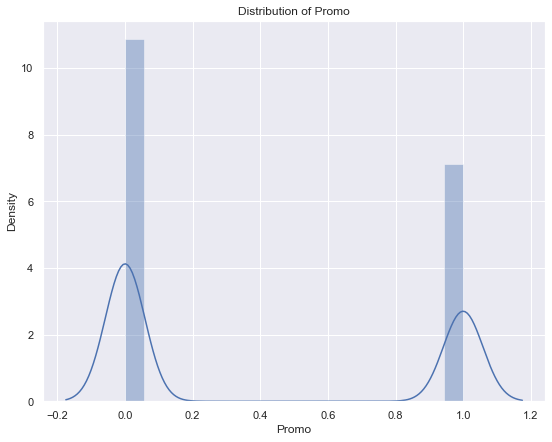

In [344]:
plt.figure(figsize=(9, 7))
sns.distplot(test_df['Promo']).set_title(f'Distribution of Promo')
plt.show()

### 2 Sales Comparision on School Holiday and Non School Holiday

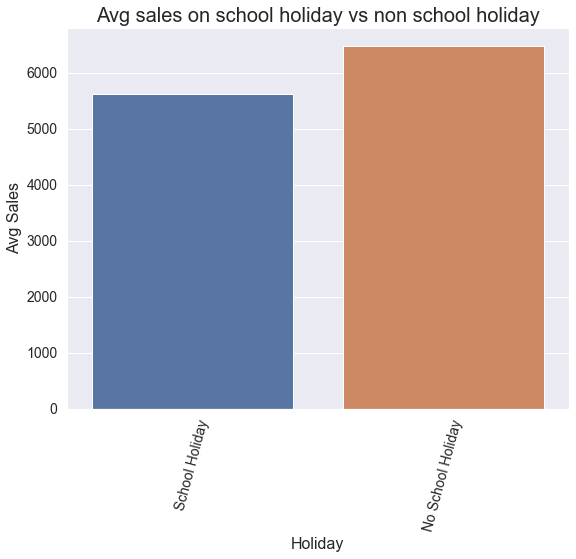

In [728]:

school_df_agg = merged_df.groupby("SchoolHoliday").agg({"Sales": "mean"}).rename(index={0: "School Holiday", 1:"No School Holiday"})
plots.plot_bar(school_df_agg, school_df_agg.index, "Sales", "Avg sales on school holiday vs non school holiday",
               "Holiday", "Avg Sales")


 - the overall avg sales non school holiday is a little bit higher

### Sales Comparision on State Holiday

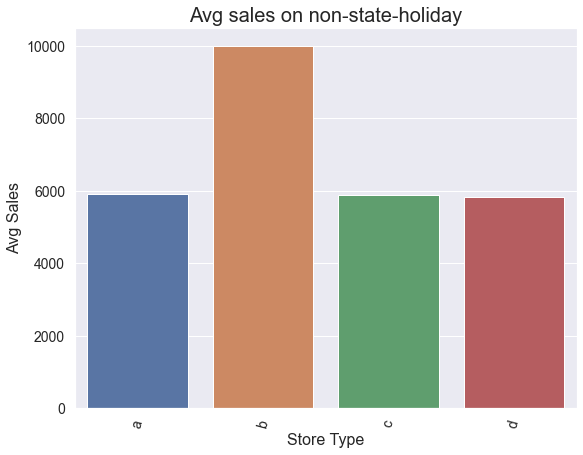

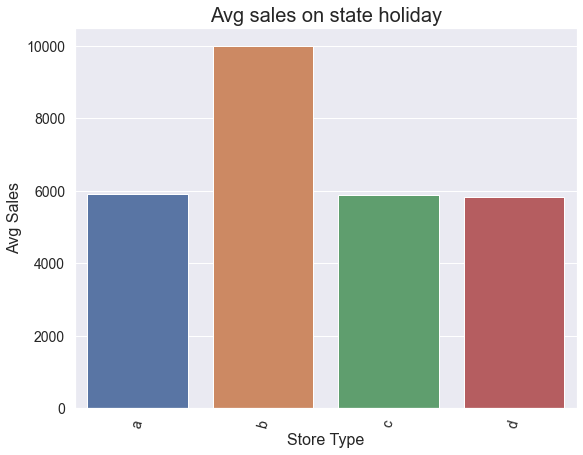

In [420]:
no_state_holday = merged_df.query("not (StateHoliday != 0 & StateHoliday != '0')")
state_holday_df = merged_df.query("StateHoliday == 0 | StateHoliday == '0'")

no_state_holiday_agg = no_state_holday.groupby("StoreType").agg({"Sales": "mean"})
state_holday_df_agg = state_holday_df.groupby("StoreType").agg({"Sales": "mean"})



plots.plot_bar(no_state_holiday_agg, no_state_holiday_agg.index, "Sales", "Avg sales on non-state-holiday",
               "Store Type", "Avg Sales")

plots.plot_bar(state_holday_df_agg, state_holday_df_agg.index, "Sales", "Avg sales on state holiday",
               "Store Type", "Avg Sales")


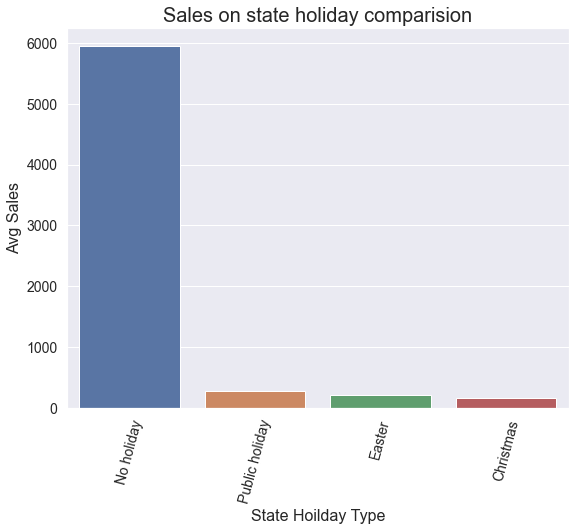

,Sales
StateHoliday,
No holiday,5947.483893
Public holiday,290.735686
Easter,214.311510
Christmas,168.733171


In [409]:


state_hoilday_comparsion = cleaned_train_df.groupby("StateHoliday").agg({"Sales": "mean"})
state_hoilday_comparsion = state_hoilday_comparsion.rename(index={"0": "No holiday", "a": "Public holiday",
                                                                    "b": "Easter", "c": "Christmas"})

plots.plot_bar(state_hoilday_comparsion, state_hoilday_comparsion.index, "Sales", "Sales on state holiday comparision",
               "State Hoilday Type", "Avg Sales")
state_hoilday_comparsion



 - Sales on state holidays are much lower.
 - When we comare state holidays, public holidays have on avg higer sales.
 - Chrismas has lower avg sales than the rest

### Comparison of Sales and Customers on days in a week

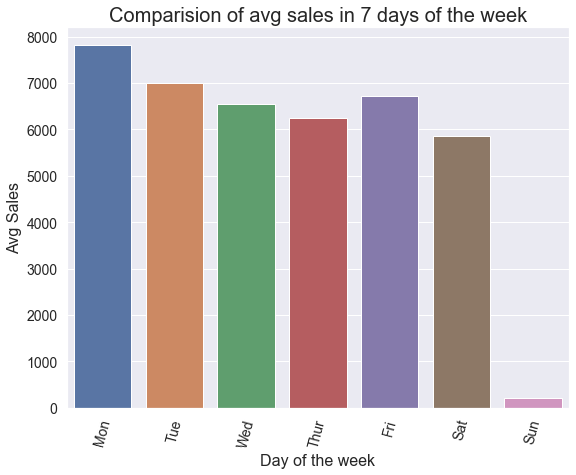

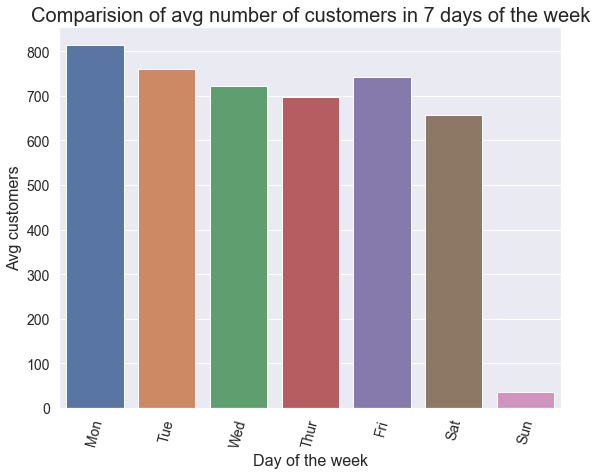

In [730]:

day_map = {1: "Mon", 2: "Tue", 3: "Wed", 4:"Thur", 5: "Fri", 6:"Sat", 7:"Sun"}

day_agg_sales = merged_df.groupby("DayOfWeek").agg({"Sales": "mean"}).rename(index=day_map)

day_agg_customers = merged_df.groupby("DayOfWeek").agg({"Customers": "mean"}).rename(index=day_map)


plots.plot_bar(day_agg_sales, day_agg_sales.index, "Sales", "Comparision of avg sales in 7 days of the week",
               "Day of the week", "Avg Sales")
plots.plot_bar(day_agg_customers, day_agg_customers.index, "Customers", "Comparision of avg number of customers in 7 days of the week",
               "Day of the week", "Avg customers")



 - Monday has the most avg sales and  avg customers
 - Sunday has the least avg sales and avg customers
 - you can see the correlation b/n sales and customers.

### Purchase behavior on Chritmass during 2013/2014

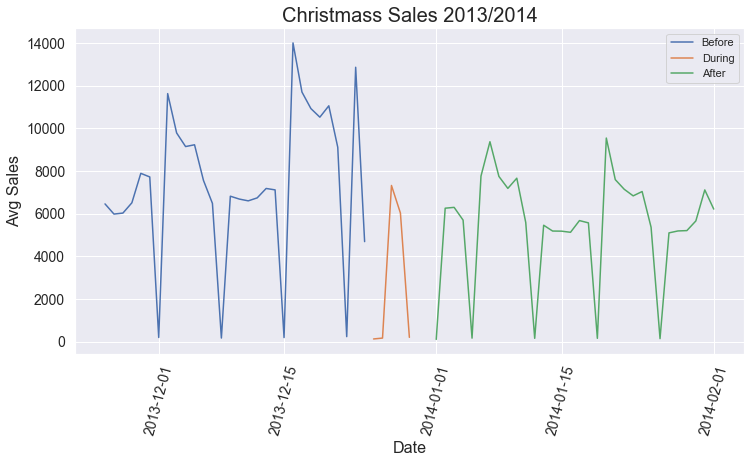

In [731]:

before_index = (train_df["Date"] >= pd.to_datetime("2013-11-25")) & (train_df["Date"] < pd.to_datetime("2013-12-25"))
before_xmass = train_df[before_index].groupby("Date").agg({"Sales": "mean"})

during_index = (train_df["Date"] >= pd.to_datetime("2013-12-25")) & (train_df["Date"] < pd.to_datetime("2013-12-30"))
during_xmass = train_df[during_index].groupby("Date").agg({"Sales": "mean"})

after_index = (train_df["Date"] >= pd.to_datetime("2014-01-01")) & (train_df["Date"] < pd.to_datetime("2014-02-02"))
after_xmass = train_df[after_index].groupby("Date").agg({"Sales": "mean"})


plt.figure(figsize=(12, 6))

sns.lineplot(x = before_xmass.index, y = before_xmass["Sales"], label='Before')
sns.lineplot(x = during_xmass.index, y = during_xmass["Sales"], label='During')
sns.lineplot(x = after_xmass.index, y = after_xmass["Sales"], label='After')

plt.title("Christmass Sales 2013/2014", size=20)
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel="Date", fontsize=16)
plt.ylabel(ylabel="Avg Sales", fontsize=16)
plt.show()


 - 1 month before christamss has a very high sales behavior especially the last two weeks before christmass has the highest peak of sales through the 2 month christmas period
 - 2 during 5 days of christmass the sales gets lower. 
 - 3 then it satys low for two weeks after dec-30 then starts rising slowly for the next 1 month 

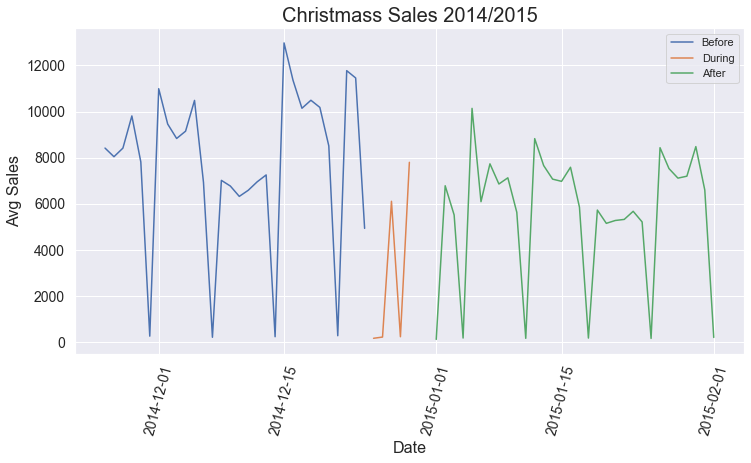

In [718]:

before_index = (train_df["Date"] >= pd.to_datetime("2014-11-25")) & (train_df["Date"] < pd.to_datetime("2014-12-25"))
before_xmass = train_df[before_index].groupby("Date").agg({"Sales": "mean"})

during_index = (train_df["Date"] >= pd.to_datetime("2014-12-25")) & (train_df["Date"] < pd.to_datetime("2014-12-30"))
during_xmass = train_df[during_index].groupby("Date").agg({"Sales": "mean"})

after_index = (train_df["Date"] >= pd.to_datetime("2015-01-01")) & (train_df["Date"] < pd.to_datetime("2015-02-02"))
after_xmass = train_df[after_index].groupby("Date").agg({"Sales": "mean"})


plt.figure(figsize=(12, 6))

sns.lineplot(x = before_xmass.index, y = before_xmass["Sales"], label='Before')
sns.lineplot(x = during_xmass.index, y = during_xmass["Sales"], label='During')
sns.lineplot(x = after_xmass.index, y = after_xmass["Sales"], label='After')

plt.title("Christmass Sales 2014/2015", size=20)
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel="Date", fontsize=16)
plt.ylabel(ylabel="Avg Sales", fontsize=16)
plt.show()


- Christmass behaviour on 2014/15 has the same pattern as 2013/2014

### Correlation b/n Sales and Customers 

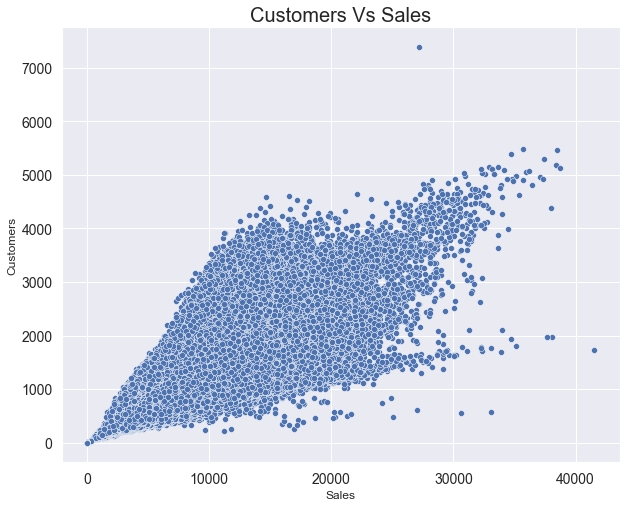

In [355]:

customer_sales_df = cleaned_train_df[["Date", "Sales", "Customers"]]
plots.plot_scatter(customer_sales_df,"Sales", "Customers", "Customers Vs Sales", None, None)






- Number of customers is higly correlated with sales
- It has a positive linear kind of realtionship

,Sales,Customers
Sales,1.000000,0.894711
Customers,0.894711,1.000000


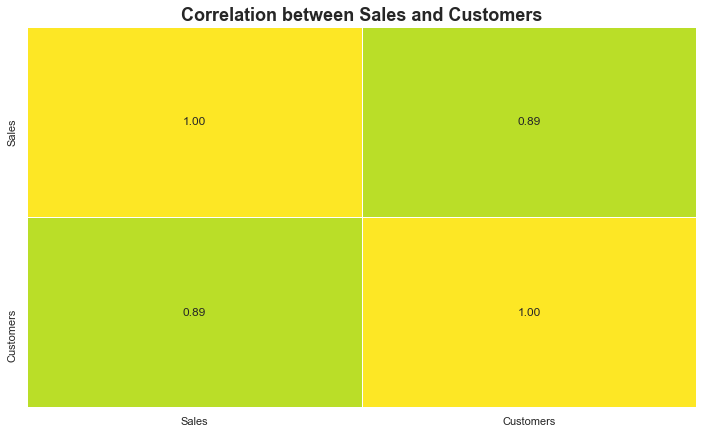

In [356]:
sales_customers_corr = cleaned_train_df[["Sales", "Customers"]].corr()
display(sales_customers_corr)
plots.plot_heatmap(sales_customers_corr, "Correlation between Sales and Customers")

-  as you can see from the heat map the correaltion is 0.89 which is very high
- has a positive correaltion

###  promotion effect on sales and customers

,Avg Promotion Sales,Avg Non-Promotion Sales,increase percent
Month,,,
1,7637.813837,4154.433175,83.847315
2,7746.883378,4477.680801,73.011068
3,8011.451617,4246.012246,88.681783
4,7948.050722,4266.077711,86.308156
5,7276.331266,4361.203367,66.842283
6,8177.309526,4362.027708,87.465786
7,8231.498481,4500.161489,82.915624
8,7860.176928,4407.173499,78.349614
9,7893.042646,4242.340072,86.053982


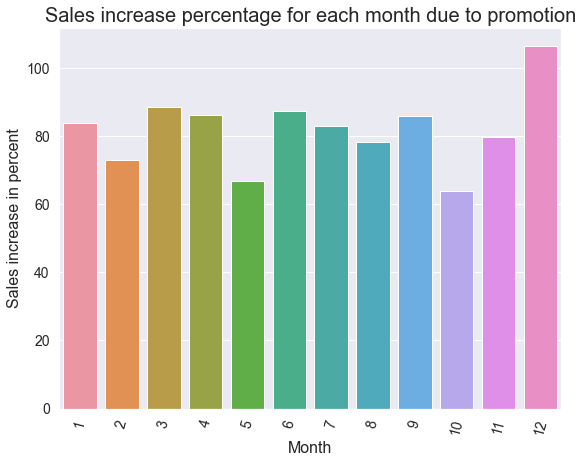

In [433]:


promo_sales = merged_df[merged_df.Promo == 1]
non_promo_sales = merged_df[merged_df.Promo == 0]

promo_sales_agg = promo_sales.groupby("Month").agg({"Sales":  "mean"})
promo_sales_agg = promo_sales_agg.rename(columns={"Sales": "Avg Promotion Sales"})

non_promo_sales_agg = non_promo_sales.groupby("Month").agg({"Sales":  "mean"})
non_promo_sales_agg = non_promo_sales_agg.rename(columns={"Sales": "Avg Non-Promotion Sales"})


pormo_non_promo_sales_df = pd.merge(promo_sales_agg, non_promo_sales_agg, on="Month")

sales_increase_diff = pormo_non_promo_sales_df["Avg Promotion Sales"] - pormo_non_promo_sales_df["Avg Non-Promotion Sales"]

pormo_non_promo_sales_df["increase percent"] = (sales_increase_diff/pormo_non_promo_sales_df["Avg Non-Promotion Sales"]) * 100
display(pormo_non_promo_sales_df)
plots.plot_bar(pormo_non_promo_sales_df, pormo_non_promo_sales_df.index,
               "increase percent", "The overall sales increase percentage for each month due to promotion",
               "Month", "Sales increase in percent")



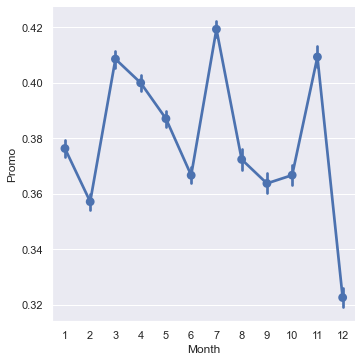

In [722]:
sns.factorplot(data = merged_df, x ="Month", y = "Promo")

- sales has very high impact on sales. You can see from the above graph that the average sales across each month has increased due to promotion
- Promotion has increased the avg sales in Dec by 83.3%. The largest increase due to promotion is on Dec.
- But Number of promotion made on Dec is the lowest when we comare it to the other months
- so we can conclude that Promotion has the highest on Dec
- Promoting more on Dec can be more efffective


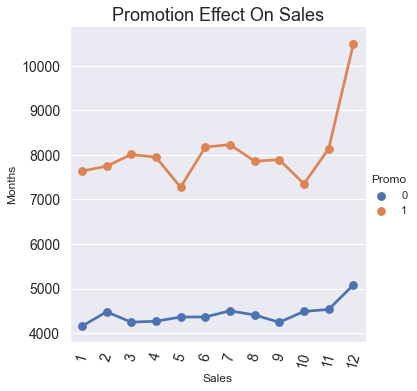

In [366]:
sns.factorplot(data = merged_df, x ="Month", y = "Sales",
               hue = 'Promo')
plt.title("Promotion Effect On Sales", size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel="Sales", fontsize=12)
plt.ylabel(ylabel="Months", fontsize=12)
plt.show()




- from the scatter plot you can see that promotion has increased sales across each month

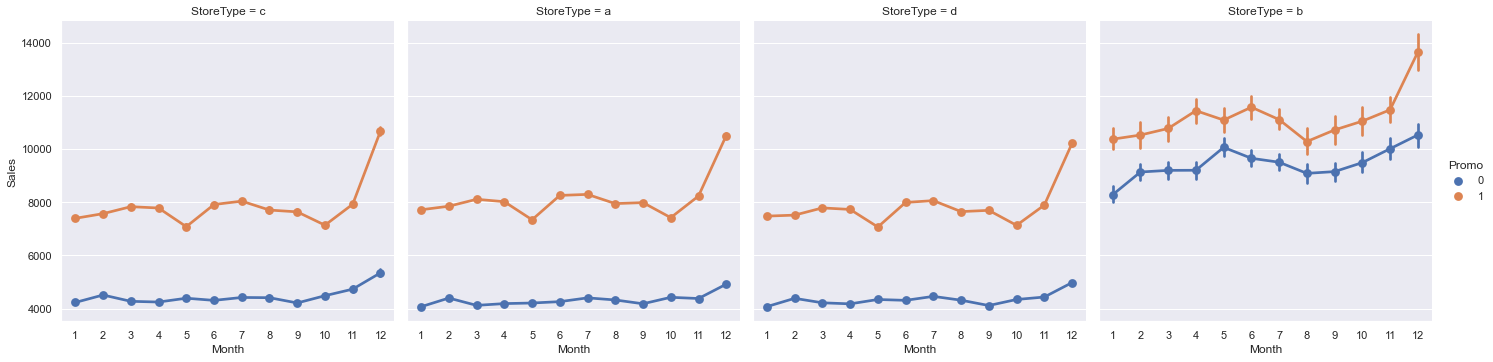

In [430]:

sns.factorplot(data = merged_df, x ="Month", y = "Sales", 
               col = 'StoreType',
               hue = 'Promo')





- for store type a, c and d, promotion has a very significant efffect on increaseing sales.
- but in store type b, it has less on effect
- Applying promotion more on store type A, B and C is more effective

,Promotion-customers,Non-promotion-customers,increase percent
Month,,,
1,7637.813837,4154.433175,83.847315
2,7746.883378,4477.680801,73.011068
3,8011.451617,4246.012246,88.681783
4,7948.050722,4266.077711,86.308156
5,7276.331266,4361.203367,66.842283
6,8177.309526,4362.027708,87.465786
7,8231.498481,4500.161489,82.915624
8,7860.176928,4407.173499,78.349614
9,7893.042646,4242.340072,86.053982


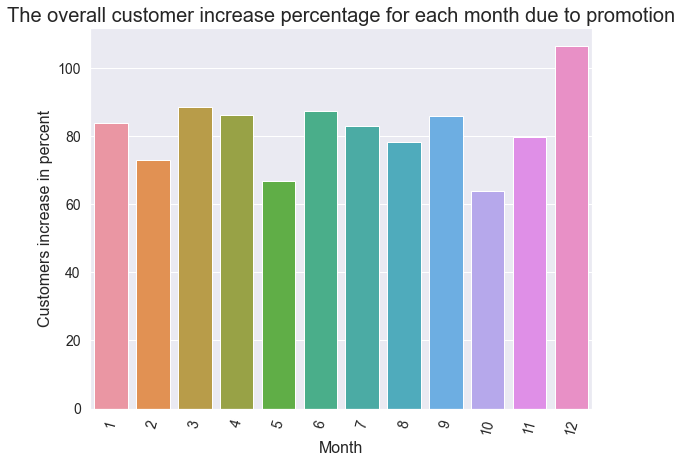

In [725]:
promo_customers = merged_df[merged_df.Promo == 1]
non_promo_customers = merged_df[merged_df.Promo == 0]

promo_customers_agg = promo_customers.groupby("Month").agg({"Sales":  "mean"})
promo_customers_agg = promo_customers_agg.rename(columns={"Sales": "Promotion-customers"})

non_promo_customers_agg = non_promo_customers.groupby("Month").agg({"Sales":  "mean"})
non_promo_customers_agg = non_promo_customers_agg.rename(columns={"Sales": "Non-promotion-customers"})


pormo_non_promo_customers = pd.merge(promo_customers_agg, non_promo_customers_agg, on="Month")


cus_increase_diff = pormo_non_promo_customers["Promotion-customers"] - pormo_non_promo_customers["Non-promotion-customers"]
pormo_non_promo_customers["increase percent"] = (cus_increase_diff/pormo_non_promo_customers["Non-promotion-customers"]) * 100
display(pormo_non_promo_customers)


plots.plot_bar(pormo_non_promo_customers, pormo_non_promo_customers.index,
               "increase percent", "The overall customer increase percentage for each month due to promotion",
               "Month", "Customers increase in percent")
               

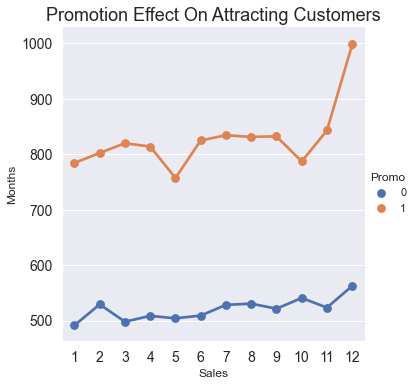

In [370]:
sns.factorplot(data = merged_df, x ="Month", y = "Customers",
               hue = 'Promo')
plt.title("Promotion Effect On Attracting Customers", size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel="Sales", fontsize=12)
plt.ylabel(ylabel="Months", fontsize=12)
plt.show()

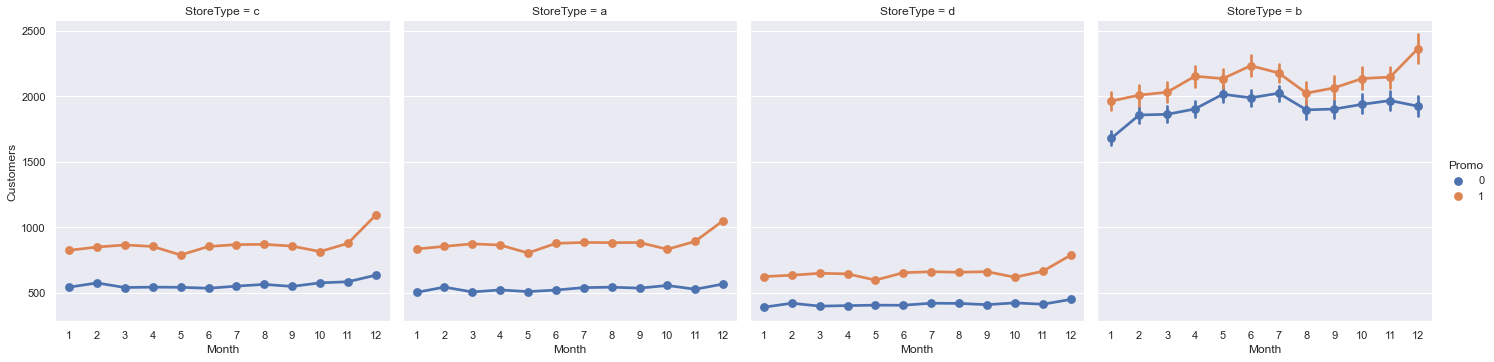

In [373]:

sns.factorplot(data = merged_df, x ="Month", y = "Customers", 
               col = 'StoreType',
               hue = 'Promo',
               title="Promotion effect on Attracting Customers For Each Store")



- Promotion increases customers. But the effect is not as much as sales. This can indicate that promotion makes existing customers to buy more than attracting new customers
- Promotion does not have much effect on store type B

### how the assortment type affects sales

In [382]:
fig = go.Figure()

a_assortment_df = merged_df[merged_df.Assortment == 'a']
b_assortment_df = merged_df[merged_df.Assortment == 'b']
c_assortment_df = merged_df[merged_df.Assortment == 'c']

a_sales_agg = a_assortment_df.groupby("Month").agg({"Sales":  "mean"})
a_sales_agg = a_sales_agg.rename(columns={"Sales": "A-type assortment sales"})

b_sales_agg = b_assortment_df.groupby("Month").agg({"Sales":  "mean"})
b_sales_agg = b_sales_agg.rename(columns={"Sales": "B-type assortment sales"})

c_sales_agg = c_assortment_df.groupby("Month").agg({"Sales":  "mean"})
c_sales_agg = c_sales_agg.rename(columns={"Sales": "C-type assortment sales"})

assortment_sales = pd.merge(a_sales_agg, b_sales_agg, on="Month")
assortment_sales = pd.merge(assortment_sales, c_sales_agg, on="Month")


display(assortment_sales)


fig.add_trace(go.Scatter(x=assortment_sales.index, y=assortment_sales['A-type assortment sales'],
                    mode='lines+markers',
                    name='A-type assortment sales'))

fig.add_trace(go.Scatter(x=assortment_sales.index,y=assortment_sales['B-type assortment sales'],
                    mode='lines+markers',
                    name='B-type assortment sales'))

fig.add_trace(go.Scatter(x=assortment_sales.index,y=assortment_sales['C-type assortment sales'],
                    mode='lines+markers',
                    name='C-type assortment sales'))
fig.show()

,A-type assortment sales,B-type assortment sales,C-type assortment sales
Month,,,
1,5244.218557,7426.112306,5686.660861
2,5396.380089,8104.128307,5889.798663
3,5499.371503,8224.057348,6071.465153
4,5477.054244,8577.082716,5991.714815
5,5210.639323,9131.075269,5748.264667
6,5466.127693,8999.653086,6044.960386
7,5731.631242,8852.003722,6391.777452
8,5324.694316,7949.796964,6063.191033
9,5294.767818,8254.686275,5829.499342


-  The Avg Sales on B-type assortement is very high 
- The Avg Sales on A-type  assortement is the lowest

### Which stores are opened on all weekday

In [736]:

non_holiday_sales = cleaned_train_df[cleaned_train_df['StateHoliday'] == '0']
week_sales = non_holiday_sales[non_holiday_sales["DayOfWeek"] < 6]

not_open_all_week_days_sales = week_sales[week_sales["Open"] == 0]["Store"].to_list()

week_day_stores = store_df[~store_df["Store"].isin(not_open_all_week_days_sales)]
non_week_day_stores = store_df[store_df["Store"].isin(not_open_all_week_days_sales)]

print("Stores that are open in all week days")
display(week_day_stores)
print(f"Number of stores that open in all week days is {week_day_stores.shape[0]}")

Stores that are open in all week days


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


Number of stores that open in all week days is 927


In [607]:

non_holiday_sales["OpenAllWeekDay"] = non_holiday_sales["Store"].apply(lambda x: x in week_day_stores["Store"].to_list())


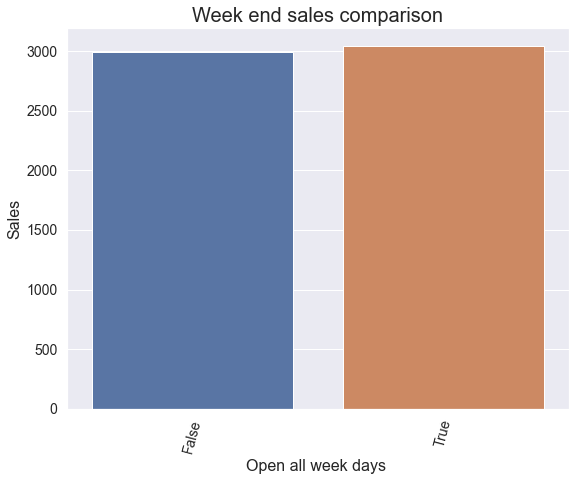

In [654]:

week_end_sales = non_holiday_sales[non_holiday_sales["DayOfWeek"] >=6 ]
week_sales = non_holiday_sales[non_holiday_sales["DayOfWeek"] < 6 ]

week_end_sales_agg  = week_end_sales.groupby("OpenAllWeekDay").agg({"Sales": "mean", "Customers":"mean"})
week_sales_agg  = week_sales.groupby("OpenAllWeekDay").agg({"Sales": "mean", "Customers":"mean"})

week_x_col = [str(a) for a in week_end_sales_agg.index.to_list()]

plots.plot_bar(week_end_sales_agg, week_x_col,
               "Sales", "Week end sales comparison",
               "Open all week days ", "Sales")




- Store that open all week days has lower week end sales than weekdays sale

### Trends of customer behavior during store open and closing times

#### Finding customer numbers for stores that open on sunday

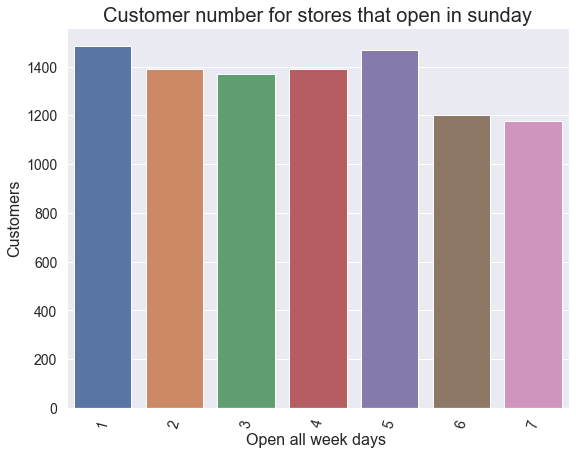

In [763]:


sunday_open = non_holiday_sales[(non_holiday_sales["DayOfWeek"] == 7) & (non_holiday_sales["Open"] == 1)]["Store"].unique()
sunday_sales_df = merged_df[merged_df["Store"].isin(sunday_open)]
sunday_open_customers = sunday_sales_df.groupby("DayOfWeek").agg({"Customers": "mean"})

plots.plot_bar(sunday_open_customers, sunday_open_customers.index,
               "Customers", "Customer number for stores that open in sunday",
               "Open all week days ", "Customers")



 - the number of customer that came to these stores on sunday are equivalent to that of satrday and is not that much lower compared to other week days. So opening in sundays can be adavtageous

### Correlation b/n Distance and Sales

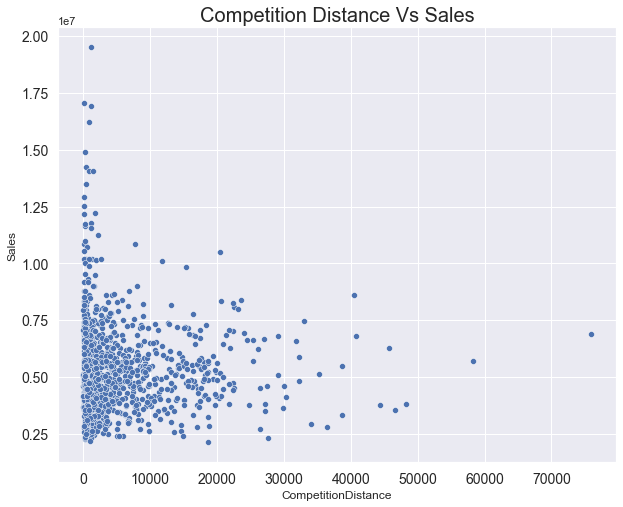

,Sales,CompetitionDistance
Sales,1.000000,-0.019229
CompetitionDistance,-0.019229,1.000000


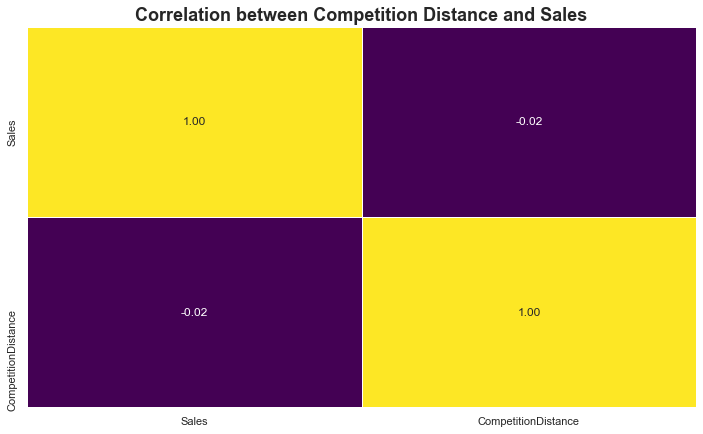

In [402]:

competition_df = merged_df[["Store", "Sales", "Customers", "StoreType", "CompetitionDistance"]]
competition_df_agg = competition_df.groupby("Store").agg({"Sales": "sum", "Customers" : "sum",
                                                      "CompetitionDistance": lambda x: max(x)})

plots.plot_scatter(competition_df_agg, "CompetitionDistance", "Sales", "Competition Distance Vs Sales", None, None)

competition_df_corr = competition_df[["Sales", "CompetitionDistance"]].corr()
display(competition_df_corr)

plots.plot_heatmap(competition_df_corr, "Correlation between Competition Distance and Sales")

-  We have a very low correlation b/n Competition Distance and Sales.
- This imply that the Sales is not much affected by Competition Distance


### How does the opening or reopening of new competitors affect stores?


In [629]:


has_open_competition_df = merged_df[merged_df['CompetitionOpenSinceMonth'].notnull()]

has_open_competition_df["CompetitionOpenSinceYear"] = has_open_competition_df["CompetitionOpenSinceYear"].astype("int").astype("str")
has_open_competition_df["CompetitionOpenSinceMonth"] = has_open_competition_df["CompetitionOpenSinceMonth"].astype("int").astype("str")

has_open_competition_df["CompetitionOpenSinceDate"] = has_open_competition_df["CompetitionOpenSinceYear"] + "-" + has_open_competition_df["CompetitionOpenSinceMonth"] + "-" + "01" 
has_open_competition_df["CompetitionOpenSinceDate"] =  pd.to_datetime(has_open_competition_df["CompetitionOpenSinceDate"])

competition_df = has_open_competition_df[["Date", "Sales", "Store", "CompetitionOpenSinceDate"]]


competition_df["BeforeCompetition"] = competition_df["Date"] < competition_df["CompetitionOpenSinceDate"]

competition_df_agg = competition_df.groupby("BeforeCompetition").agg({"Sales": "mean"})



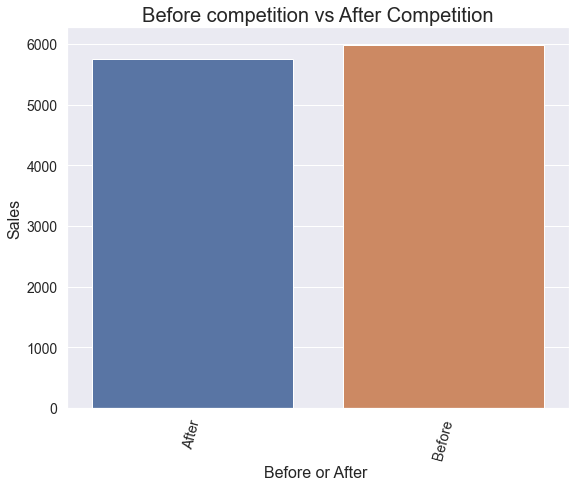

In [640]:

x_col = []
for val in competition_df_agg.index.to_list():
    if (val):
        x_col.append("Before")
    else:
        x_col.append("After")

plots.plot_bar(competition_df_agg, x_col,
               "Sales", "Before competition vs After Competition",
               "Before or After ", "Sales")


In [774]:
print("Overall avg sales before competition and after competition")
display(competition_df_agg)

decrease = competition_df_agg["Sales"][True] - competition_df_agg["Sales"][False]
decrease_percent = decrease / competition_df_agg["Sales"][True]

print(f"Overall avg sales decreased after competition by {decrease_percent * 100:.3f}%")


Overall avg sales before competition and after competition


,Sales
BeforeCompetition,
False,5753.971338
True,5974.642737


Overall avg sales decreased after competition by 3.693%


- As you can observe from the graph the sales has dropped when new competition is opened.
- But the effect is not that much, it only decreased by 3.693%

### Trend of Sales

In [819]:
date_trend = merged_df.groupby("Date").agg({"Sales": "mean"})

daily_trend_a = merged_df[merged_df["StoreType"] == "a"].groupby("Date").agg({"Sales": "mean"})
daily_trend_b = merged_df[merged_df["StoreType"] == "b"].groupby("Date").agg({"Sales": "mean"})
daily_trend_c = merged_df[merged_df["StoreType"] == "c"].groupby("Date").agg({"Sales": "mean"})
daily_trend_d = merged_df[merged_df["StoreType"] == "d"].groupby("Date").agg({"Sales": "mean"})


month_trend_a = merged_df[merged_df["StoreType"] == "a"].groupby("Month").agg({"Sales": "mean"})
month_trend_b = merged_df[merged_df["StoreType"] == "b"].groupby("Month").agg({"Sales": "mean"})
month_trend_c = merged_df[merged_df["StoreType"] == "c"].groupby("Month").agg({"Sales": "mean"})
month_trend_d = merged_df[merged_df["StoreType"] == "d"].groupby("Month").agg({"Sales": "mean"})



                                          
year_trend = merged_df.groupby("Year").agg({"Sales": "mean"})
year_trend_a = merged_df[merged_df["StoreType"] == "a"].groupby("Year").agg({"Sales": "mean"})
year_trend_b = merged_df[merged_df["StoreType"] == "b"].groupby("Year").agg({"Sales": "mean"})
year_trend_c = merged_df[merged_df["StoreType"] == "c"].groupby("Year").agg({"Sales": "mean"})
year_trend_d = merged_df[merged_df["StoreType"] == "d"].groupby("Year").agg({"Sales": "mean"})

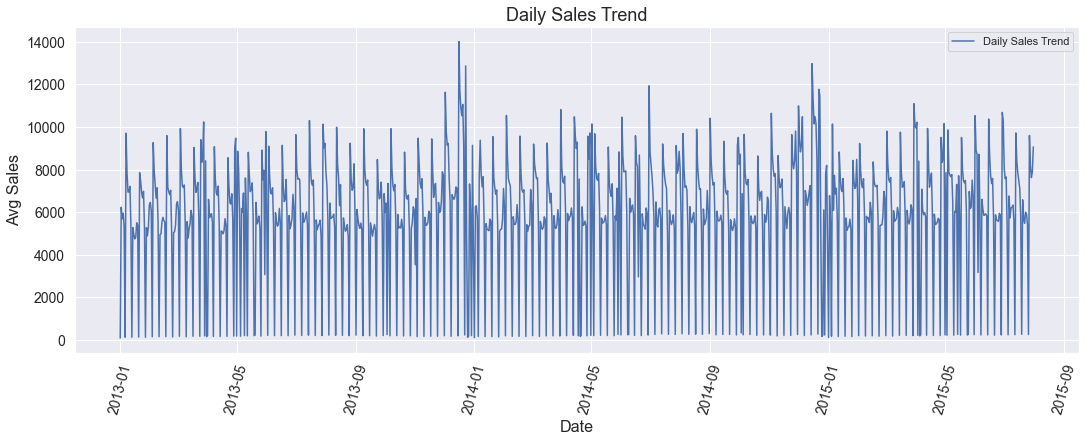

In [777]:
plt.figure(figsize=(18, 6))

sns.lineplot(x = date_trend.index, y = date_trend["Sales"], label='Daily Sales Trend')

plt.title("Daily Sales Trend", size=18)
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel="Date", fontsize=16)
plt.ylabel(ylabel="Avg Sales", fontsize=16)
plt.show()

<Figure size 1296x432 with 0 Axes>

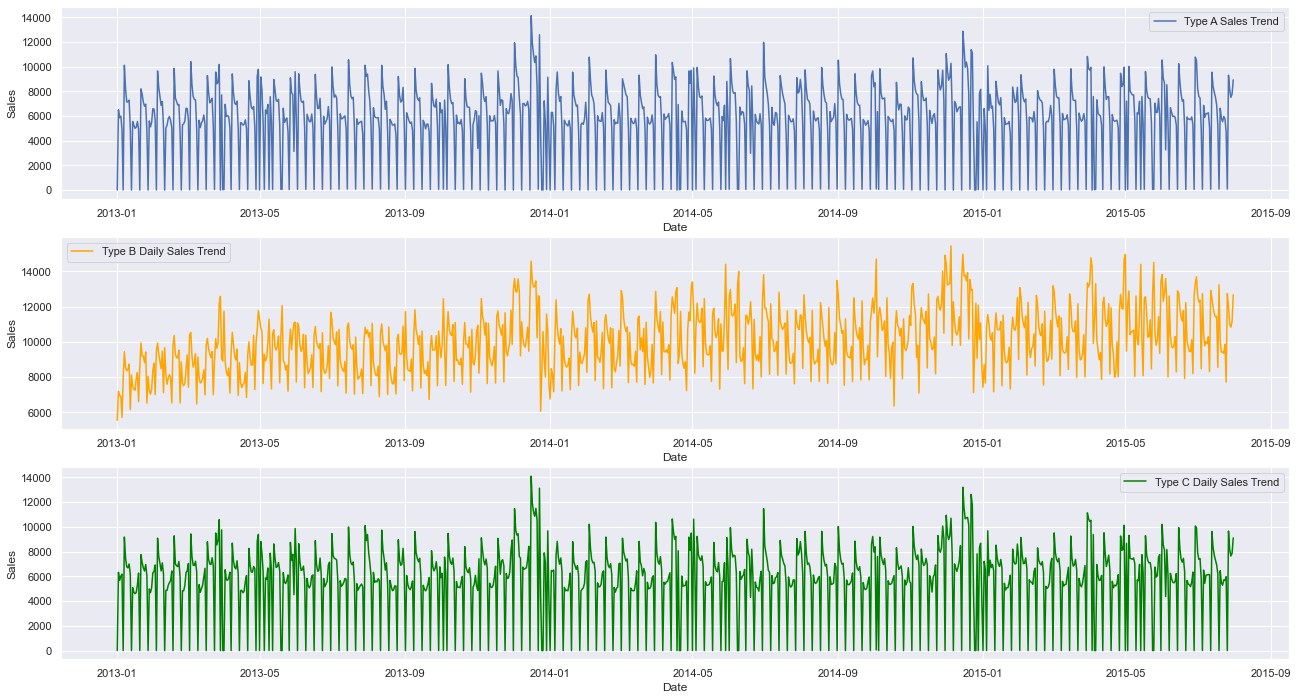

In [821]:
plt.figure(figsize=(18, 6))
fig, axs = plt.subplots(3, 1, figsize=(22, 12))

sns.lineplot(x = daily_trend_a.index, y = daily_trend_a["Sales"], label='Type A Sales Trend', ax=axs[0])
sns.lineplot(color="orange", x = daily_trend_b.index, y = daily_trend_b["Sales"], label='Type B Daily Sales Trend', ax=axs[1])
sns.lineplot(color="green", x = daily_trend_c.index, y = daily_trend_c["Sales"], label='Type C Daily Sales Trend', ax=axs[2])

plt.show()


<Figure size 648x504 with 0 Axes>

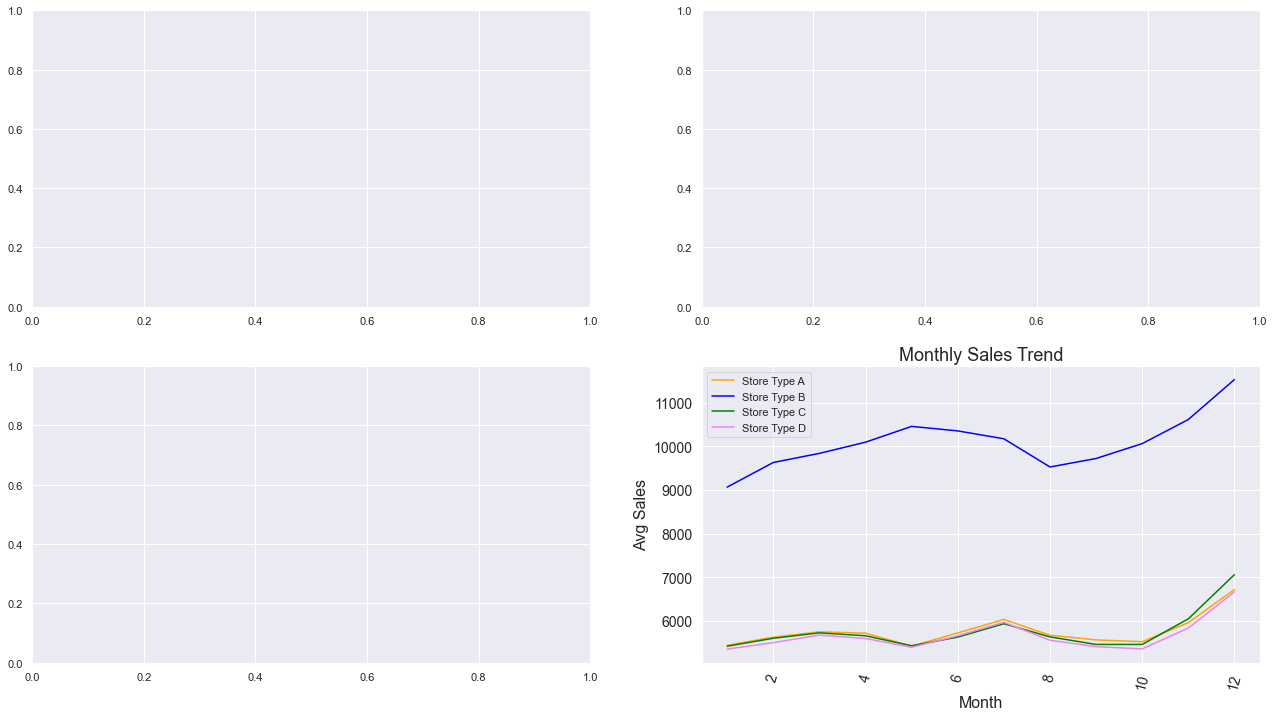

In [829]:
plt.figure(figsize=(9, 7))
year_trend.index = year_trend.index.astype('str')
fig, axs = plt.subplots(2, 2, figsize=(22, 12))

sns.lineplot(color="orange", x = month_trend_a.index, y = month_trend_a["Sales"], label='Store Type A', ax=axs[0, 0])
sns.lineplot(color="blue", x = month_trend_b.index, y = month_trend_b["Sales"], label='Store Type B', ax=axs[0, 1])
sns.lineplot(color="green", x = month_trend_c.index, y = month_trend_c["Sales"], label='Store Type C', ax=axs[1, 0])
sns.lineplot(color="violet", x = month_trend_d.index, y = month_trend_d["Sales"], label='Store Type D', ax=axs[1, 1])


plt.title("Monthly Sales Trend", size=18)
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel="Month", fontsize=16)
plt.ylabel(ylabel="Avg Sales", fontsize=16)
plt.show()

 - For Store Type A, C, D the sales increases from Jan to March, Then it decreases from March to May. Then it increases from May to Jul. And Decreases again from Jul-Oct. Finally it increases from Oct-Dec at a very high rate
 - For Store Type B, th salses increases from Jan to May. Then it decreases from May to Aug. Then it increases from Sep-Dec at a vaey high rate
    

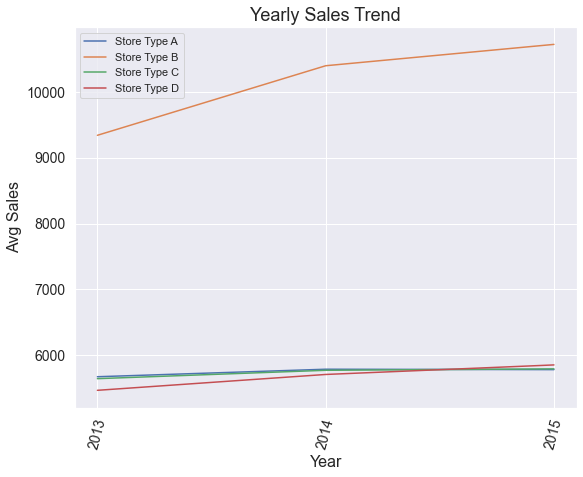

In [809]:
plt.figure(figsize=(9, 7))
year_trend.index = year_trend.index.astype('str')


sns.lineplot(x = year_trend_a.index.astype('str'), y = year_trend_a["Sales"], label='Store Type A')
sns.lineplot(x = year_trend_b.index.astype('str'), y = year_trend_b["Sales"], label='Store Type B')
sns.lineplot(x = year_trend_c.index.astype('str'), y = year_trend_c["Sales"], label='Store Type C')
sns.lineplot(x = year_trend_d.index.astype('str'), y = year_trend_d["Sales"], label='Store Type D')



plt.title("Yearly Sales Trend", size=18)
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel="Year", fontsize=16)
plt.ylabel(ylabel="Avg Sales", fontsize=16)
plt.show()

<Figure size 648x504 with 0 Axes>

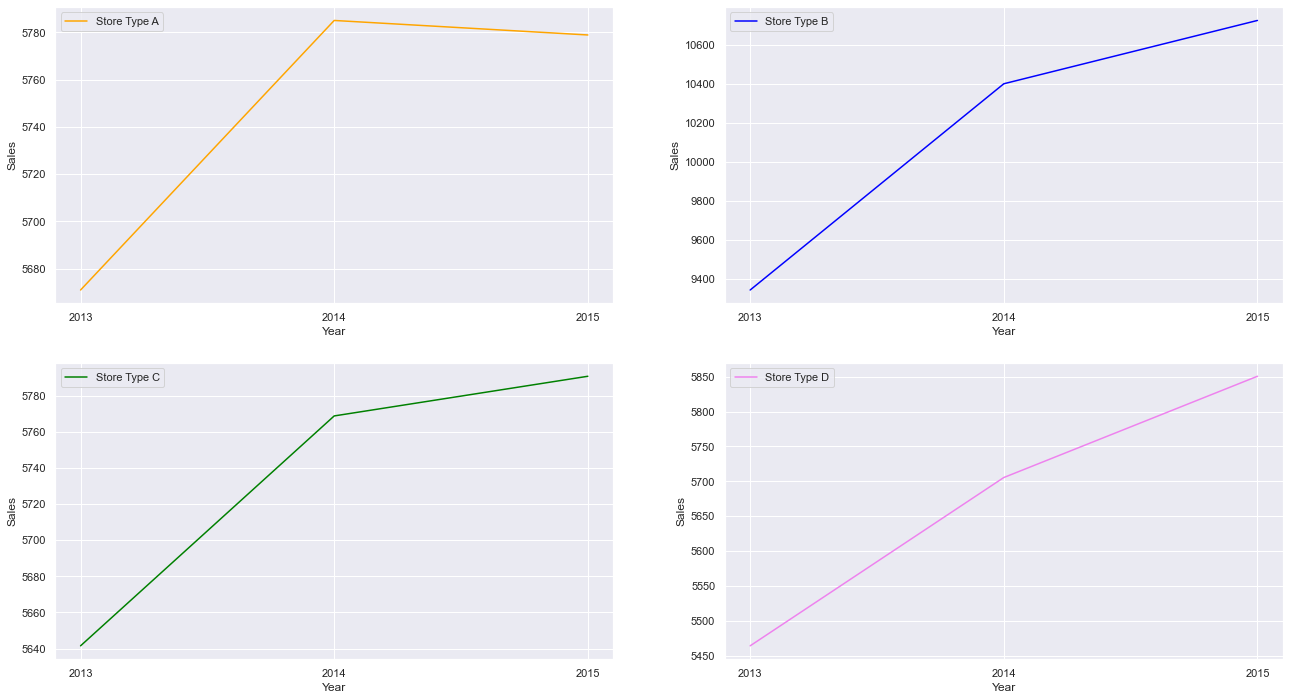

In [805]:
plt.figure(figsize=(9, 7))
year_trend.index = year_trend.index.astype('str')
fig, axs = plt.subplots(2, 2, figsize=(22, 12))


sns.lineplot(color="orange", x = year_trend_a.index.astype('str'), y = year_trend_a["Sales"], label='Store Type A', ax=axs[0, 0])
sns.lineplot(color="blue", x = year_trend_b.index.astype('str'), y = year_trend_b["Sales"], label='Store Type B', ax=axs[0, 1])
sns.lineplot(color="green", x = year_trend_c.index.astype('str'), y = year_trend_c["Sales"], label='Store Type C', ax=axs[1, 0])
sns.lineplot(color="violet", x = year_trend_d.index.astype('str'), y = year_trend_d["Sales"], label='Store Type D', ax=axs[1, 1])


plt.show()

- Sales Seem to increase at a higher rate from 2013-2014 than 2014-2015 All Stores except A Type. 

### Daily Trend for each year

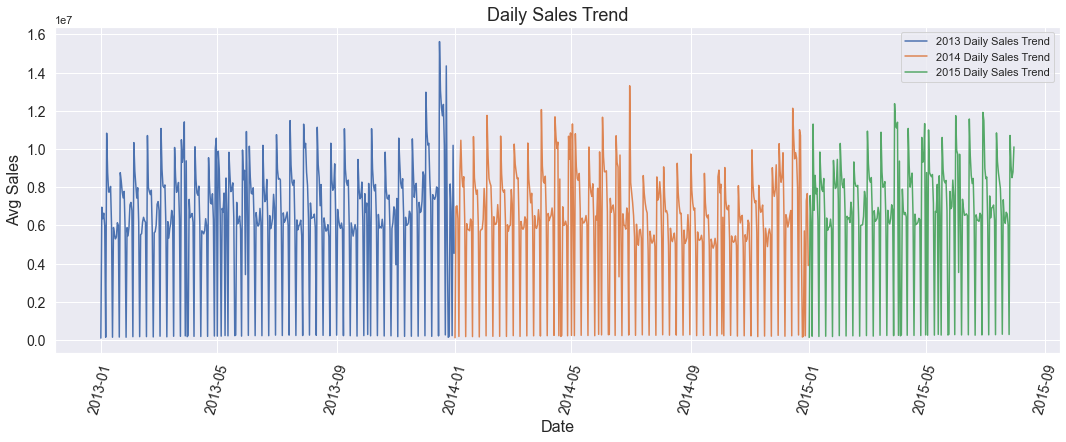

In [825]:
year_trend_2013 = merged_df[merged_df["Year"] == 2013].groupby("Date").agg({"Sales": "sum", "Customers": "mean"})
year_trend_2014 = merged_df[merged_df["Year"] == 2014].groupby("Date").agg({"Sales": "sum", "Customers": "mean"})
year_trend_2015 = merged_df[merged_df["Year"] == 2015].groupby("Date").agg({"Sales": "sum", "Customers": "mean"})


plt.figure(figsize=(18, 6))

sns.lineplot(x = year_trend_2013.index, y = year_trend_2013["Sales"], label='2013 Daily Sales Trend')
sns.lineplot(x = year_trend_2014.index, y = year_trend_2014["Sales"], label='2014 Daily Sales Trend')
sns.lineplot(x = year_trend_2015.index, y = year_trend_2015["Sales"], label='2015 Daily Sales Trend')



plt.title("Daily Sales Trend", size=18)
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel="Date", fontsize=16)
plt.ylabel(ylabel="Avg Sales", fontsize=16)
plt.show()

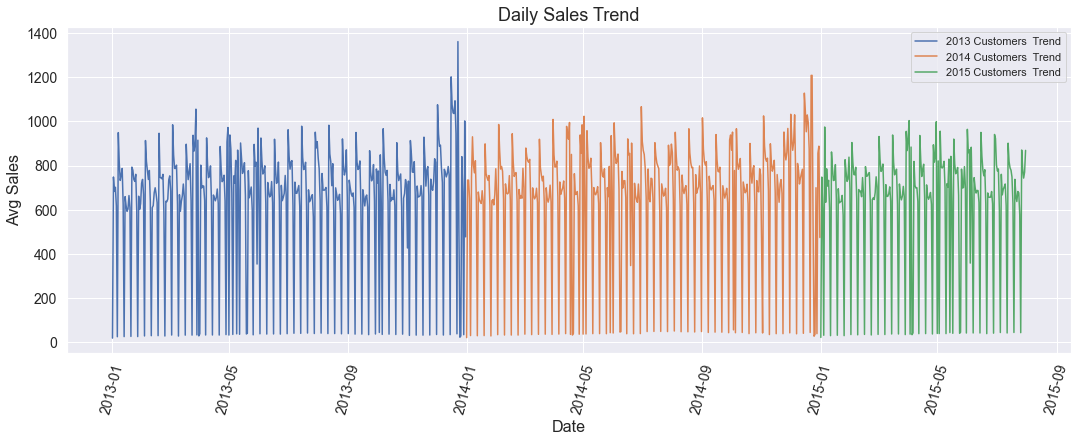

In [828]:
plt.figure(figsize=(18, 6))
sns.lineplot(x = year_trend_2013.index, y = year_trend_2013["Customers"], label='2013 Customers  Trend')
sns.lineplot(x = year_trend_2014.index, y = year_trend_2014["Customers"], label='2014 Customers  Trend')
sns.lineplot(x = year_trend_2015.index, y = year_trend_2015["Customers"], label='2015 Customers  Trend')

plt.title("Daily Sales Trend", size=18)
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel="Date", fontsize=16)
plt.ylabel(ylabel="Avg Sales", fontsize=16)
plt.show()

<Figure size 1296x432 with 0 Axes>

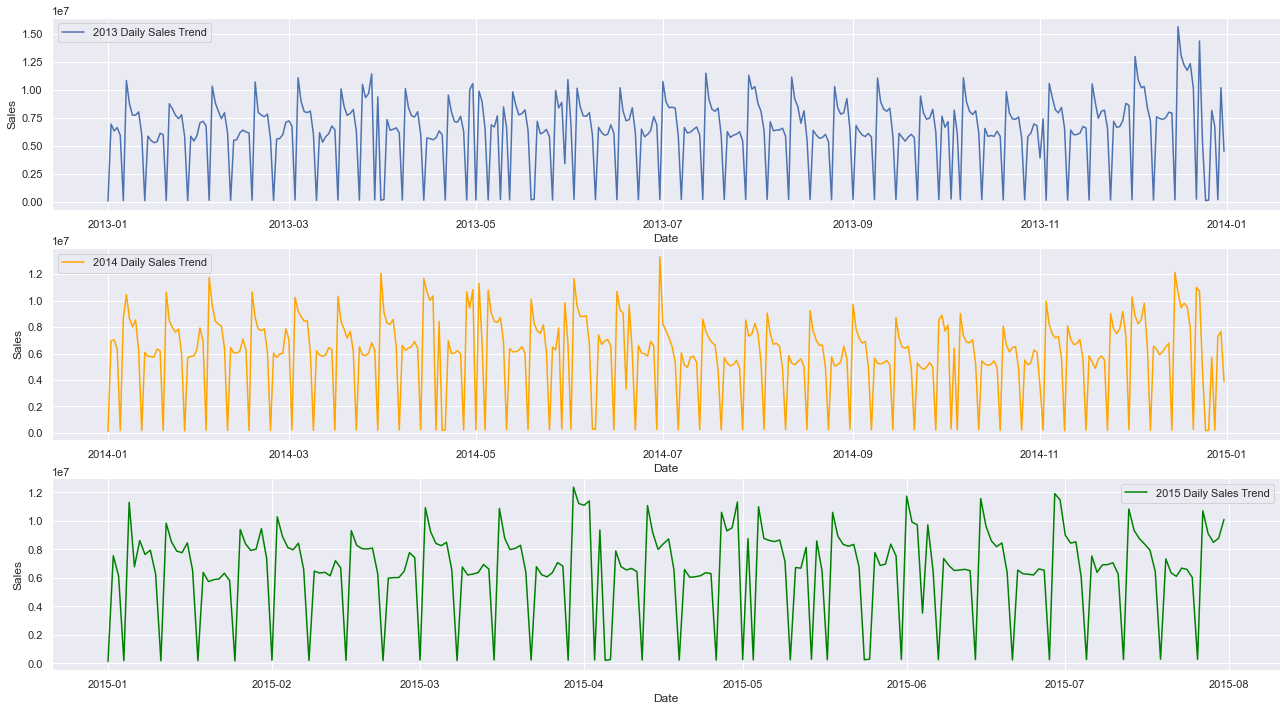

In [818]:
plt.figure(figsize=(18, 6))
fig, axs = plt.subplots(3, 1, figsize=(22, 12))

sns.lineplot(x = year_trend_2013.index, y = year_trend_2013["Sales"], label='2013 Daily Sales Trend', ax=axs[0])
sns.lineplot(color="orange", x = year_trend_2014.index, y = year_trend_2014["Sales"], label='2014 Daily Sales Trend', ax=axs[1])
sns.lineplot(color="green", x = year_trend_2015.index, y = year_trend_2015["Sales"], label='2015 Daily Sales Trend', ax=axs[2])

plt.show()

<Figure size 1296x432 with 0 Axes>

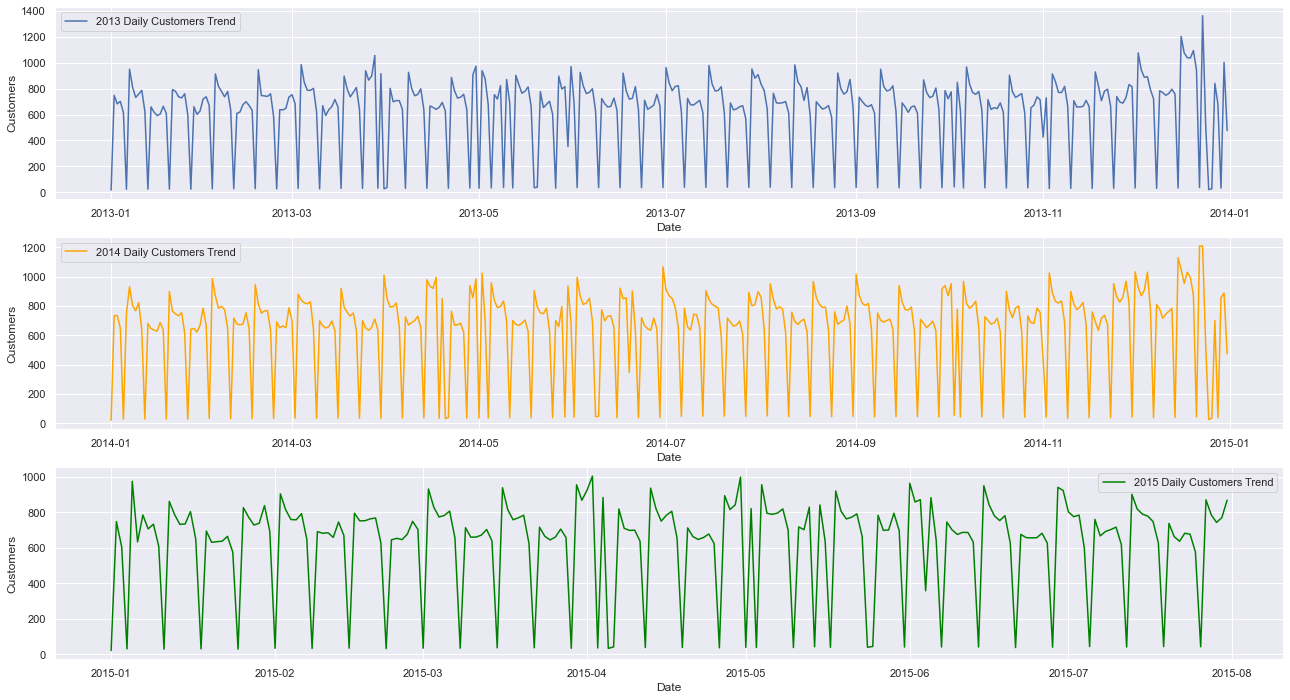

In [822]:
plt.figure(figsize=(18, 6))
fig, axs = plt.subplots(3, 1, figsize=(22, 12))

sns.lineplot(x = year_trend_2013.index, y = year_trend_2013["Customers"], label='2013 Daily Customers Trend', ax=axs[0])
sns.lineplot(color="orange", x = year_trend_2014.index, y = year_trend_2014["Customers"], label='2014 Daily Customers Trend', ax=axs[1])
sns.lineplot(color="green", x = year_trend_2015.index, y = year_trend_2015["Customers"], label='2015 Daily Customers Trend', ax=axs[2])

plt.show()

### feature_selection

In [830]:
merged_df.corr()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641,0.000290,0.001467,0.000023,-0.026413,-0.050746,-0.004592,0.008488,0.009865,0.038928
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388,0.001937,-0.005362,0.005136,-0.000025,0.000006,-0.000025,0.000168,0.000174,0.000049
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124,0.023519,0.048768,-0.011612,-0.019229,-0.028257,0.012659,-0.091040,0.059558,-0.021127
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568,-0.001212,0.038179,-0.004473,-0.102861,-0.030954,0.008931,-0.150159,0.040531,0.028974
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171,-0.001009,-0.000681,0.033428,0.007992,0.001384,0.002771,-0.008309,-0.002430,0.001637
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483,0.024300,-0.011747,-0.108325,0.000138,-0.000023,0.000152,-0.000983,-0.001008,-0.000283
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000,-0.036535,0.103282,0.030538,-0.003689,-0.000526,0.001520,-0.006909,-0.003133,-0.003682
Year,0.000290,0.001937,0.023519,-0.001212,-0.001009,0.024300,-0.036535,1.000000,-0.269382,-0.002485,0.000703,-0.000121,0.000771,-0.004982,-0.005055,-0.001418
Month,0.001467,-0.005362,0.048768,0.038179,-0.000681,-0.011747,0.103282,-0.269382,1.000000,0.012442,0.003578,-0.000624,0.003916,-0.025323,-0.026127,-0.007328
Day,0.000023,0.005136,-0.011612,-0.004473,0.033428,-0.108325,0.030538,-0.002485,0.012442,1.000000,0.000049,-0.000006,0.000056,-0.000354,-0.000362,-0.000101
